<a href="https://colab.research.google.com/github/Chicken2322/Stock-Prediction/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [63]:
from sklearn.preprocessing import MinMaxScaler
from pyramid.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [64]:
#setting scaler in the the range between 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

In [65]:
df = pd.read_csv("/content/drive/My Drive/reliance_data.csv")
df=df.dropna()

In [66]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6034 entries, 0 to 6159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6034 non-null   object 
 1   Open       6034 non-null   float64
 2   High       6034 non-null   float64
 3   Low        6034 non-null   float64
 4   Close      6034 non-null   float64
 5   Adj Close  6034 non-null   float64
 6   Volume     6034 non-null   float64
dtypes: float64(6), object(1)
memory usage: 377.1+ KB


In [68]:
df.head()




,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.431136,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.412238,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.430546,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.408093,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.391556,76213503.0


In [69]:
#We are converting date into date_time objects and setting it as index
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df = df.sort_index(ascending=True, axis=0)

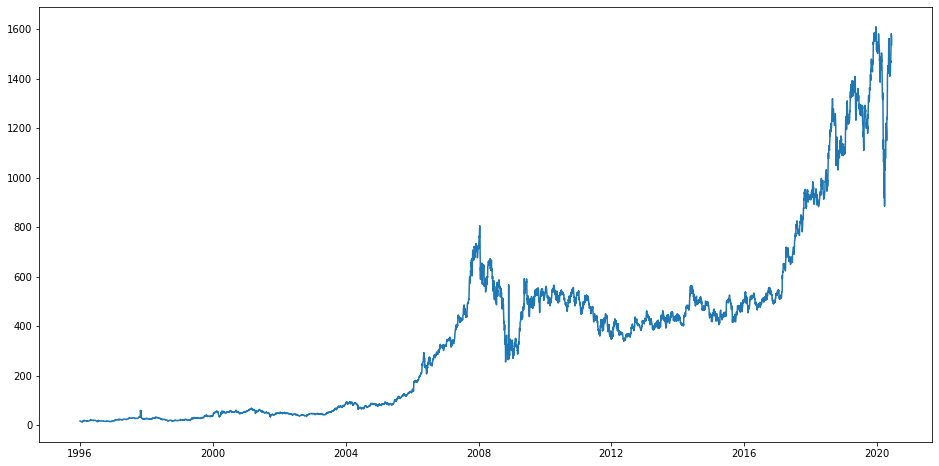

In [70]:
#plotting the closing price of the company 
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [71]:
#Now we are analysing our data by Moving Average Method and creating dataframe with date  
#and the target variable( In this case , CLOSING PRICE)
data = pd.DataFrame(data={'Date':df.Date,'Close': df.Close})
data.info()
data.size

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6034 entries, 1996-01-01 to 2020-06-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6034 non-null   datetime64[ns]
 1   Close   6034 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 141.4 KB


12068

In [72]:
#While splitting the data into train and validation set
#we cannot use random splitting since that will destroy the time component
#So here we slice the data 
length = int(data.size / data.columns.size * 0.92)
train = data[:length]
valid = data[length:]


In [73]:
print('Shape of training set:')
print(train.shape)

print('\n Shape of validation set:')
print(valid.shape)

Shape of training set:
(5430, 2)

 Shape of validation set:
(604, 2)


<Figure size 432x288 with 0 Axes>

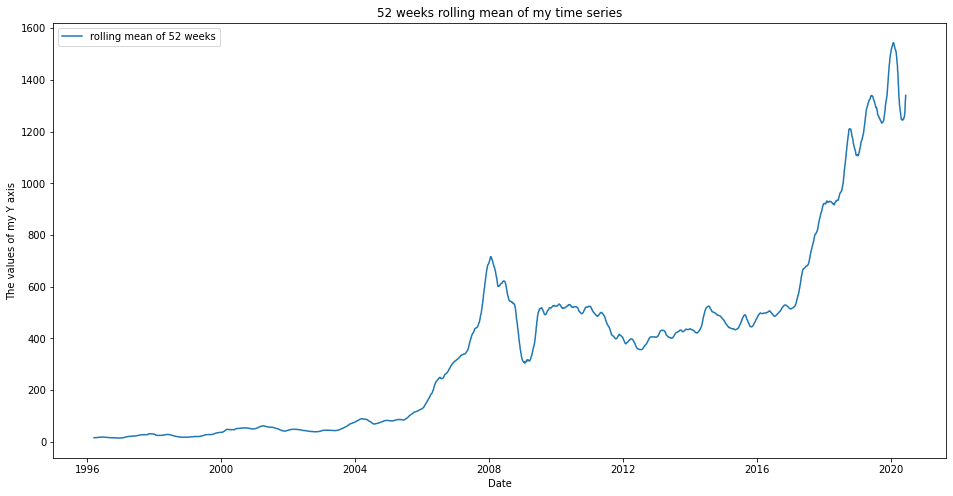

In [74]:
#Using rolling mean from Moving Average library 
plt.clf()
plt.figure(figsize=(16,8))
data_mean = data.rolling(window=52).mean()
plt.plot(data_mean ,label="rolling mean of 52 weeks" )
plt.xlabel("Date")
plt.ylabel("The values of my Y axis")
plt.title("2 year rolling mean of my time series")
plt.legend(loc="upper left")
plt.show()

In [75]:
preds=[]
valid_size= valid.Close.size
train_size= train.Close.size
for i in range(0 , valid_size):
    a = train['Close'][train_size - 365 + i:].sum() + sum(preds)
    b = a/365
    preds.append(b)

In [76]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
409.3573447236704


<Figure size 432x288 with 0 Axes>

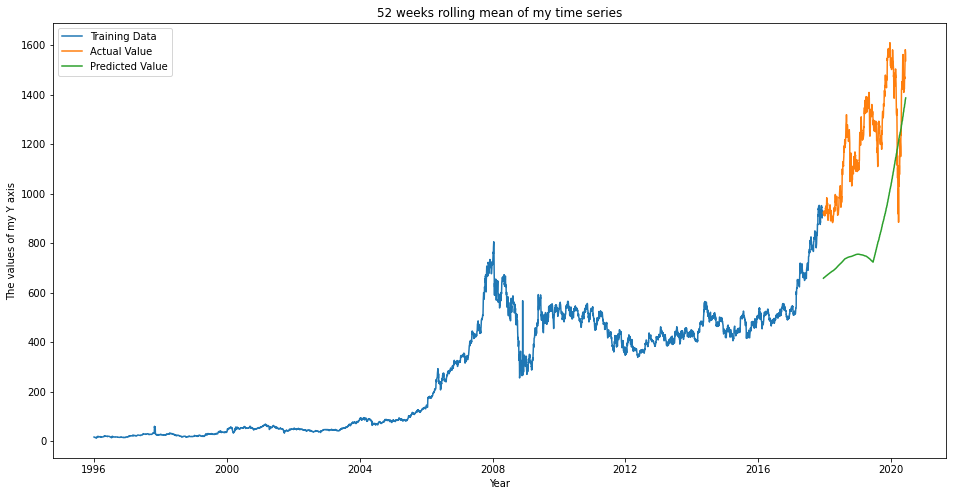

In [77]:
#plotting prediction we did using Moving Average (Manually)
plt.clf()
plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'], label="Training Data")
plt.plot(valid[['Close']] , label='Actual Value')
plt.plot(valid[[ 'Predictions']] , label='Predicted Value')

plt.xlabel("Year")
plt.ylabel("The values of my Y axis")
plt.title("52 weeks rolling mean of my time series")
plt.legend(loc="upper left")
plt.show()

In [78]:
# Now we implement ARIMA models (Auto Regressive Integrated Moving Average)
data = df.sort_index(ascending=True, axis=0)
length = int(data.size / data.columns.size * 0.96)

train = data[:length]
valid = data[length:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast_data = model.predict(n_periods=validation.size)
forecast_data = pd.DataFrame(forecast_data,index = valid.index,columns=['Prediction'])


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=42377.820, BIC=42411.078, Fit time=73.297 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=45978.895, BIC=45992.199, Fit time=0.473 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=44382.403, BIC=44409.009, Fit time=9.494 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=42398.224, BIC=42424.831, Fit time=46.213 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=42357.616, BIC=42397.525, Fit time=80.112 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=44366.295, BIC=44399.553, Fit time=18.196 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=42379.164, BIC=42425.725, Fit time=119.810 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=45647.180, BIC=45673.786, Fit time=28.455 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=42361.064, BIC=42414.277, Fit time=215.475 seconds
F

In [81]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast_data['Prediction'])),2)))
print("RMS value from ARIMA Model {}".format(rms))

RMS value from ARIMA Model 139.51480910536822


<Figure size 432x288 with 0 Axes>

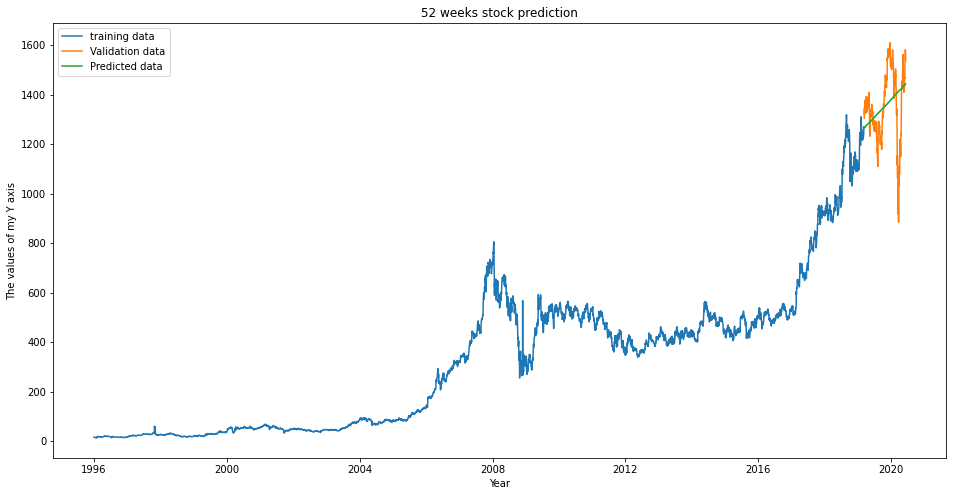

In [86]:
#plotting prediction we did using ARIMA models
plt.clf()
plt.figure(figsize=(16,8))
plt.plot(train['Close'],label="training data")
plt.plot(valid['Close'],label="Validation data")
plt.plot(forecast_data['Prediction'],label="Predicted data")
plt.xlabel("Year")
plt.ylabel("The values of my Y axis")
plt.title("52 weeks stock prediction")
plt.legend(loc="upper left")
plt.show()